<a href="https://colab.research.google.com/github/renatoIFPB/Curso_IA/blob/main/projeto_final_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = sns.load_dataset('taxis') #Carrega o dataset na variavel df
df = df.dropna(how='any',axis=0) #Deleta linhas com valor vazio
df = df.drop(['dropoff'], axis=1) #Deleta as colunas 'dropoff'
df["pickup"] = df["pickup"].astype("datetime64[ns]").dt.date
df = df.sort_values(by = 'pickup') #Ordena o dataset por data
df.drop(index=df.index[0], axis=0, inplace=True) #Remove a primeira linha

In [ ]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

In [ ]:
df

In [ ]:
taxis_daily = df.groupby(["pickup","payment"], as_index=False).agg(
    total_passengers = ("passengers","sum"),
    total_amount = ("total","sum")
)

taxis_daily.head()
# sns.relplot(data=taxis_daily, x="pickup", y="total_passengers",
#             hue="payment", kind="line", height=5, aspect=2)

In [ ]:
pickup_borough_daily = df.groupby(['pickup','pickup_borough'])['pickup_borough'].count()
print(pickup_borough_daily)

In [ ]:
# from google.colab import data_table
# from vega_datasets import data

# data_table.enable_dataframe_formatter()

pickup_borough_daily = df.groupby(["pickup","pickup_borough"], as_index=False).agg(
    total_pickup_borough = ("pickup_borough","count"))

pickup_borough_daily

<Axes: xlabel='total_pickup_borough', ylabel='pickup'>

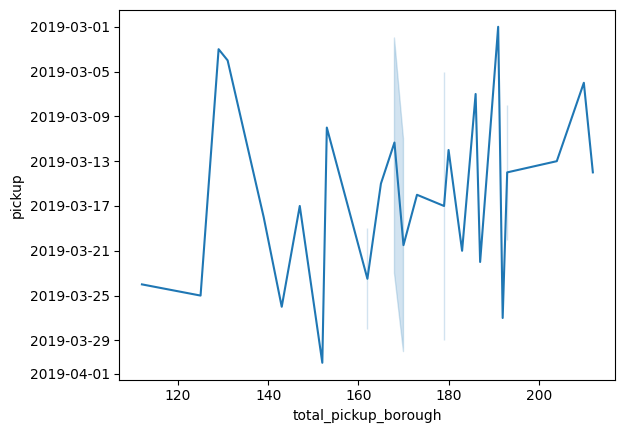

In [113]:
may_flights = pickup_borough_daily.query("pickup_borough == 'Manhattan'")
sns.lineplot(data=may_flights, x="total_pickup_borough", y="pickup")

# sns.relplot(data=taxis_daily, x="pickup", y="total_passengers",
#             hue="payment", kind="line", height=5, aspect=2)

# pickup_borough_daily = df.groupby(["pickup"], as_index=False).agg(
#     total_pickup_borough = ("pickup_borough","count")
# )
# pickup_borough_daily.head()

# sns.displot(data=pickup_borough_daily, x="total_pickup_borough", kind="hist",
#             height=5, aspect=1.5, bins=12)

# pickup_borough_daily = df.groupby(['pickup','pickup_borough'])['pickup_borough'].count()
# print(pickup_borough_daily)
# sns.displot(data=pickup_borough_daily, x="pickup_borough", kind="hist",
#             height=5, aspect=1.5, bins=12)


In [ ]:
pickup_borough_df = df.groupby(["pickup",'pickup_borough'])['payment'].count()
dropoff_borough_df = df.groupby(["pickup",'dropoff_borough'])['dropoff_borough'].count()

print("Get count of each group:\n", pickup_borough_df)
print("Get count of each group:\n", dropoff_borough_df)